### Want to see if there's any relationship between action value from behavioral model to behavioral variables
- Reaction time of trial
- Position in block?

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils
import utils.behavioral_utils as behavioral_utils

import os
import pandas as pd
import matplotlib

In [2]:
session = 20180802
beh_path = f"/data/rawdata/sub-SA/sess-{session}/behavior/sub-SA_sess-{session}_object_features.csv"
beh = pd.read_csv(beh_path)
valid_beh = behavioral_utils.get_valid_trials(beh)
beh_w_rpes = behavioral_utils.get_rpes_per_session(session, valid_beh)

In [3]:
beh_w_rpes["DecisionTime"] = beh_w_rpes["FeedbackOnset"] - 800 - beh_w_rpes["StimOnset"]

Text(0, 0.5, 'Decision Time')

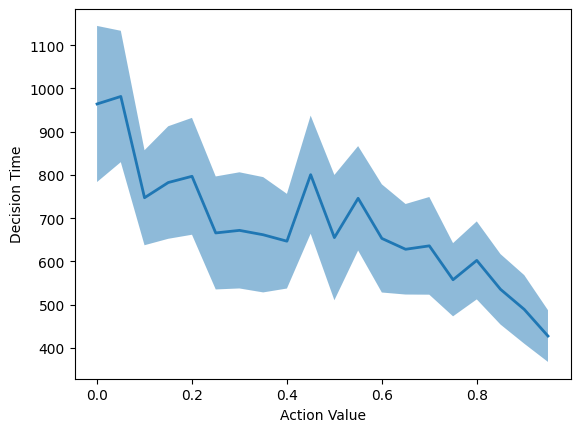

In [4]:
beh_w_rpes["Prob_FEBin"] = (beh_w_rpes.Prob_FE * 20).astype(int)
means = beh_w_rpes.groupby("Prob_FEBin")["DecisionTime"].mean()
stds = beh_w_rpes.groupby("Prob_FEBin")["DecisionTime"].std()
sterr = stds / np.sqrt(len(stds))
prob_bins = np.arange(0, 1.0, 0.05)

fig, ax = plt.subplots()
mean_line, = ax.plot(prob_bins, means, linewidth=2)
std_line = ax.fill_between(prob_bins, means - sterr, means + sterr, alpha=0.5)
ax.set_xlabel("Action Value")
ax.set_ylabel("Decision Time")

In [ ]:
def get_block_lengths(block):
    block["BlockLength"] = len(block)
    return block
beh_w_rpes = beh_w_rpes.groupby("BlockNumber").apply(get_block_lengths).reset_index()

In [ ]:
beh_w_rpes["BlockPosition"] = beh_w_rpes.TrialAfterRuleChange / (beh_w_rpes.BlockLength - 1)

In [ ]:
beh_w_rpes["BlockPositionBin"] = (beh_w_rpes.BlockPosition * 20).astype(int)
means = beh_w_rpes.groupby("BlockPositionBin")["Prob_FE"].mean()
stds = beh_w_rpes.groupby("BlockPositionBin")["Prob_FE"].std()

fig, ax = plt.subplots()
time_bins = np.arange(0, 1.05, 0.05)
mean_line, = ax.plot(time_bins, means, linewidth=2)
sterr = stds / np.sqrt(len(stds))

std_line = ax.fill_between(time_bins, means - sterr, means + sterr, alpha=0.5)
ax.set_xlabel("Relative block position")
ax.set_ylabel("Action Value")